In [21]:
import plotly.graph_objects as go

In [22]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [24]:
import pandas as pd

In [25]:
from perlin_noise import PerlinNoise

In [26]:

# Define grid size
size = 50

# Initialize Perlin Noise
noise = PerlinNoise(octaves=4, seed=42)

# Generate elevation data using Perlin noise
elevation = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        elevation[i, j] = noise([i / size, j / size])

# Normalize elevation values to range 0-100
elevation = (elevation - np.min(elevation)) / (np.max(elevation) - np.min(elevation)) * 100

# Convert to Pandas DataFrame for display
df = pd.DataFrame(elevation.round(1))


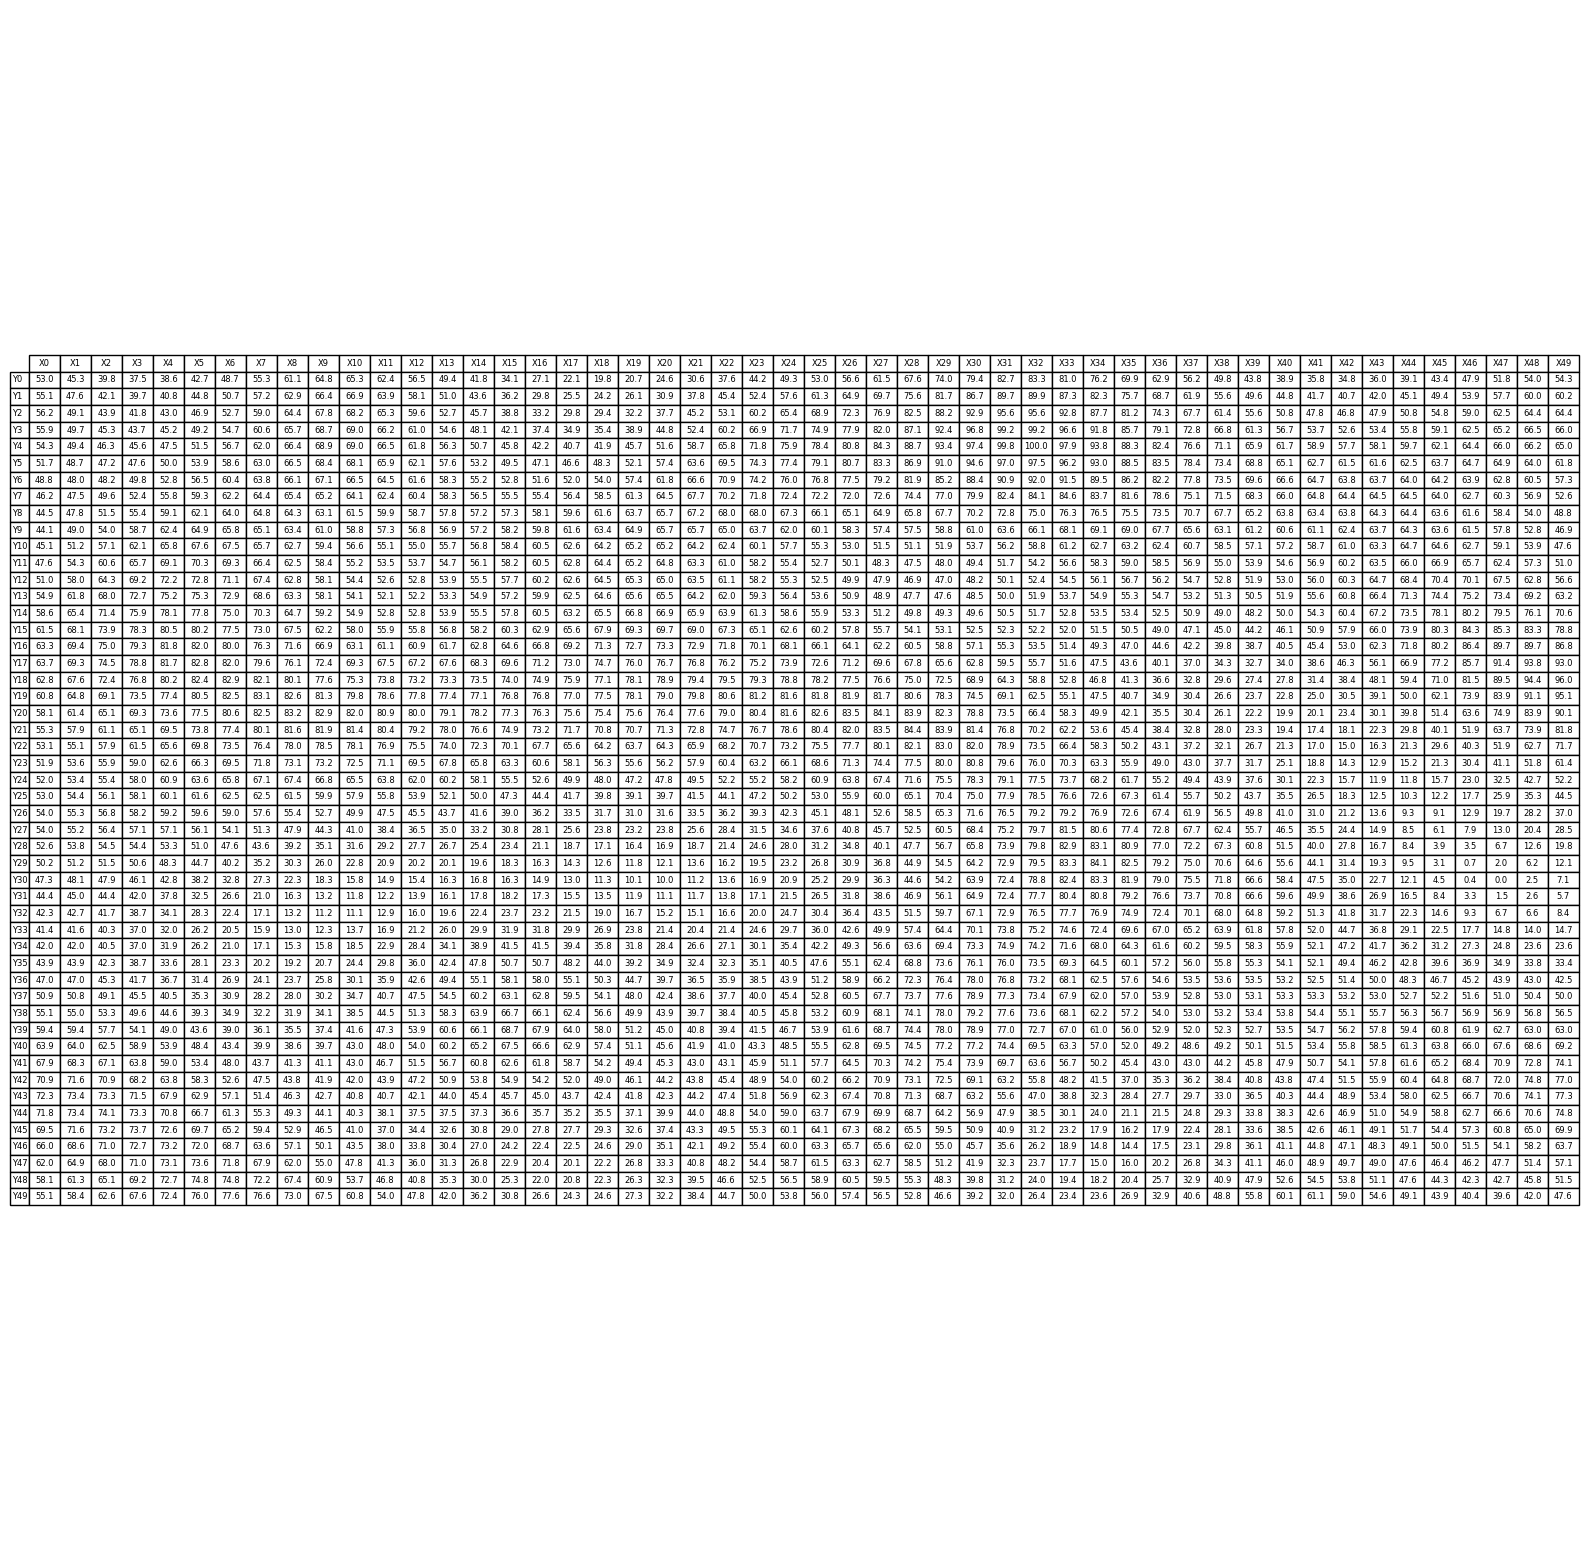

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.axis("tight")
ax.axis("off")

table = ax.table(cellText=df.values, 
                 colLabels=[f"X{i}" for i in range(size)], 
                 rowLabels=[f"Y{i}" for i in range(size)], 
                 cellLoc="center", 
                 loc="center")

# Adjust table font size for readability
table.auto_set_font_size(True)
table.set_fontsize(6)

plt.show()

In [28]:
X, Y = np.meshgrid(np.arange(size), np.arange(size))

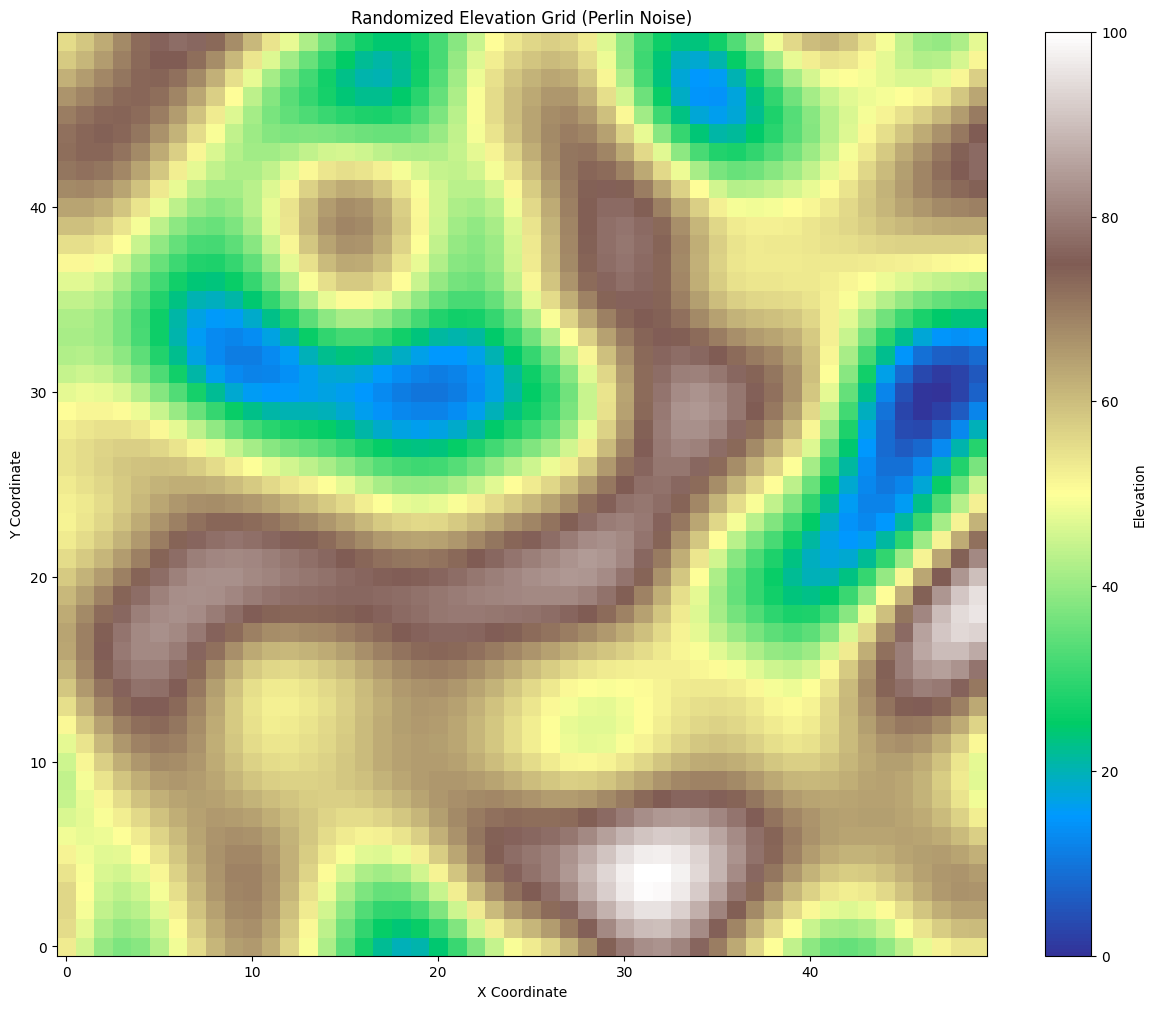

In [29]:
plt.figure(figsize=(15, 12))
plt.imshow(elevation, cmap='terrain', origin='lower', aspect='auto')
plt.colorbar(label="Elevation")
plt.title("Randomized Elevation Grid (Perlin Noise)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


In [30]:
print(df.head())

     0     1     2     3     4     5     6     7     8     9   ...    40  \
0  53.0  45.3  39.8  37.5  38.6  42.7  48.7  55.3  61.1  64.8  ...  38.9   
1  55.1  47.6  42.1  39.7  40.8  44.8  50.7  57.2  62.9  66.4  ...  44.8   
2  56.2  49.1  43.9  41.8  43.0  46.9  52.7  59.0  64.4  67.8  ...  50.8   
3  55.9  49.7  45.3  43.7  45.2  49.2  54.7  60.6  65.7  68.7  ...  56.7   
4  54.3  49.4  46.3  45.6  47.5  51.5  56.7  62.0  66.4  68.9  ...  61.7   

     41    42    43    44    45    46    47    48    49  
0  35.8  34.8  36.0  39.1  43.4  47.9  51.8  54.0  54.3  
1  41.7  40.7  42.0  45.1  49.4  53.9  57.7  60.0  60.2  
2  47.8  46.8  47.9  50.8  54.8  59.0  62.5  64.4  64.4  
3  53.7  52.6  53.4  55.8  59.1  62.5  65.2  66.5  66.0  
4  58.9  57.7  58.1  59.7  62.1  64.4  66.0  66.2  65.0  

[5 rows x 50 columns]


In [31]:
aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'oxy', 'peach', 'phase', 'picnic', 'pinkyl',
             'piyg', 'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn',
             'puor', 'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu',
             'rdgy', 'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar',
             'spectral', 'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn',
             'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid',
             'turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr',
             'ylorrd'

SyntaxError: unterminated string literal (detected at line 1) (320578151.py, line 1)

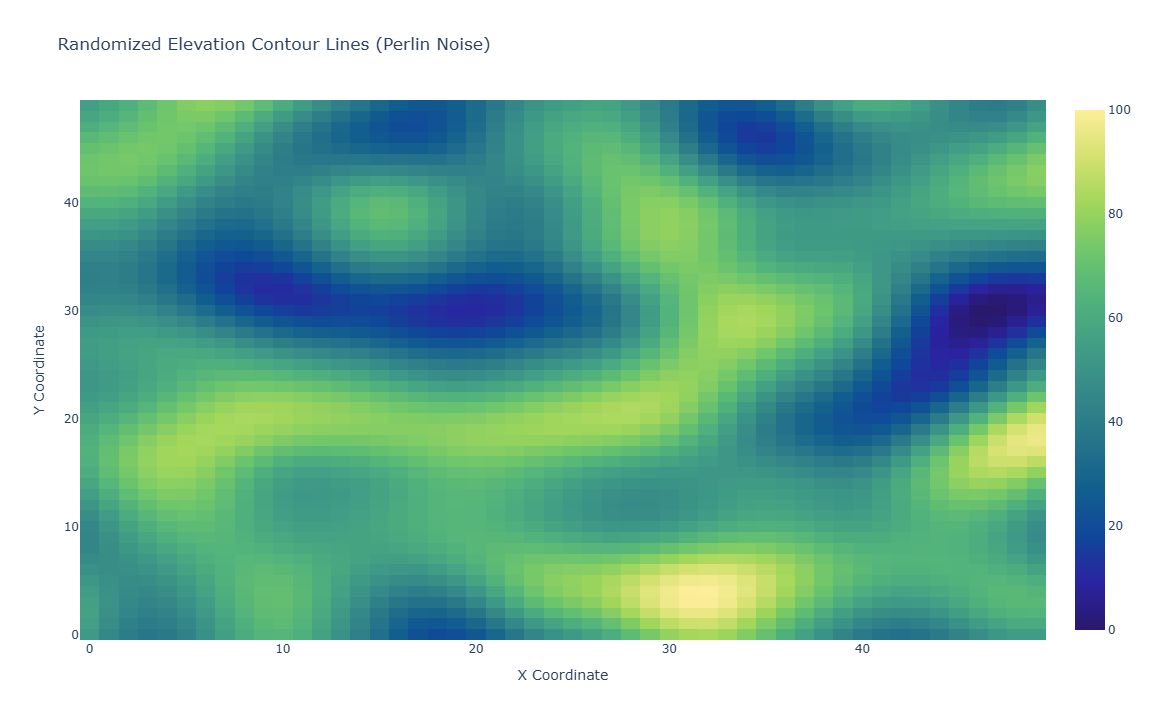

In [32]:
size = elevation.shape[0]

# Create the heat map in plotly
fig = go.Figure(data=go.Heatmap(
    z=elevation,      # Elevation values
    x=np.linspace(0, size-1, size),  # X coordinates (0 to size-1)
    y=np.linspace(0, size-1, size),  # Y coordinates (0 to size-1)
    colorscale='haline'  # Use the 'viridis' color scale
))
# Update the layout with titles and labels
fig.update_layout(
    title="Randomized Elevation Contour Lines (Perlin Noise)",
    xaxis_title="X Coordinate",
    yaxis_title="Y Coordinate",
    coloraxis_colorbar=dict(
        title="Elevation"  # Color bar label
    ),
    width=900,
    height=720
)

# Show the plot
fig.show()

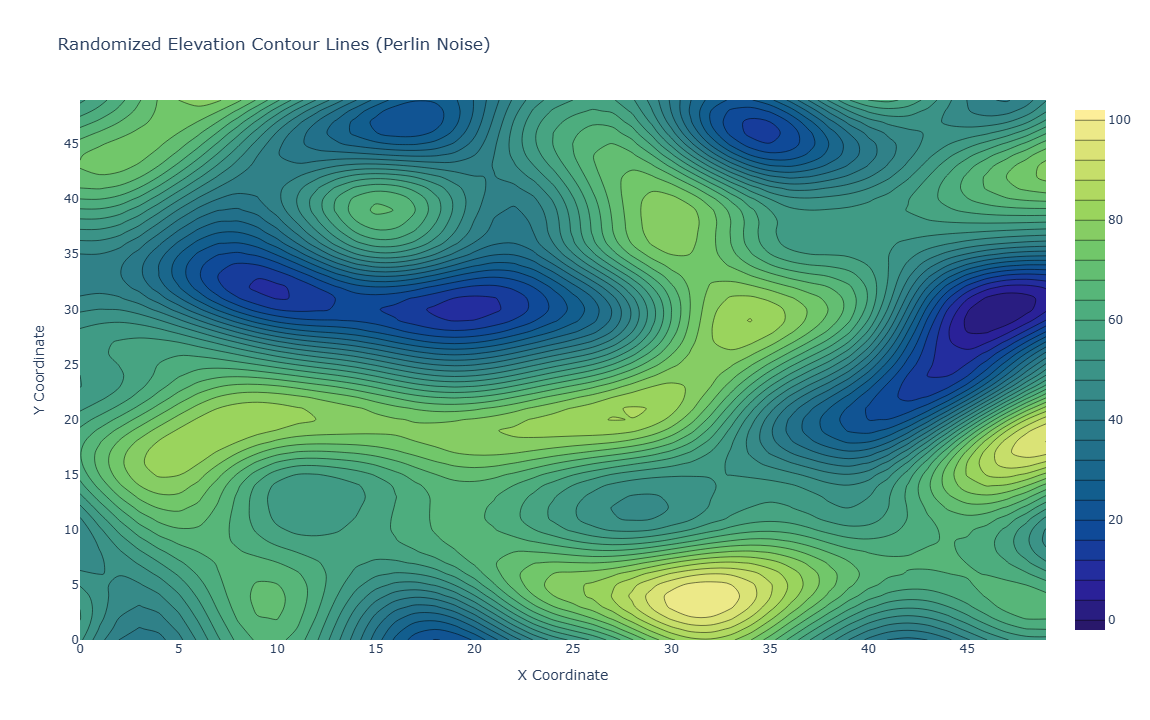

In [33]:

# Create the contour plot in plotly
fig = go.Figure(data=go.Contour(
    z=elevation,      # Elevation values
    x=np.linspace(0, size-1, size),  # X coordinates (0 to size-1)
    y=np.linspace(0, size-1, size),  # Y coordinates (0 to size-1)
    colorscale='haline',  # Use the 'terrain' color scale
    contours=dict(
        start=elevation.min(),  # Set the starting level for contours
        end=elevation.max(),    # Set the ending level for contours
        size=(elevation.max() - elevation.min()) / 25  # Set the contour level spacing
    )
))

# Update the layout with titles and labels
fig.update_layout(
    title="Randomized Elevation Contour Lines (Perlin Noise)",
    xaxis_title="X Coordinate",
    yaxis_title="Y Coordinate",
    coloraxis_colorbar=dict(
        title="Elevation"  # Color bar label
    ),
    width=900,
    height=720
)

# Show the plot
fig.show()

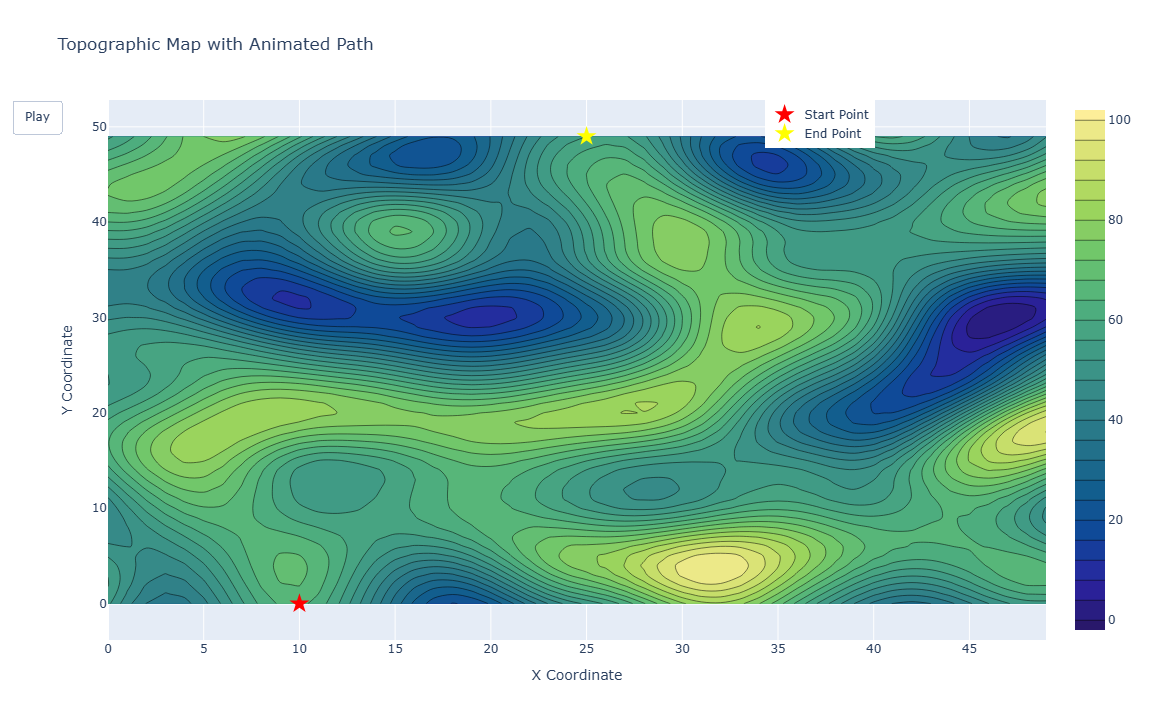

In [99]:
import heapq
import numpy as np
import plotly.graph_objects as go

# Define grid size and Perlin noise elevation data
size = 50
noise = PerlinNoise(octaves=4, seed=42)
elevation = np.zeros((size, size))

for i in range(size):
    for j in range(size):
        elevation[i, j] = noise([i / size, j / size])

elevation = (elevation - np.min(elevation)) / (np.max(elevation) - np.min(elevation)) * 100

# Define start and end points
start_x, start_y = 10, 0
end_x, end_y = 25, size - 1  # y=49 if size=50

# Heuristic function: Manhattan distance
def heuristic(x, y):
    return abs(x - end_x) + abs(y - end_y)

# A* algorithm
def a_star_search(start_x, start_y):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start_x, start_y), start_x, start_y))  # (f_cost, x, y)
    
    came_from = {}
    g_costs = { (start_x, start_y): 0 }
    f_costs = { (start_x, start_y): heuristic(start_x, start_y) }

    path_x, path_y = [], []
    
    while open_set:
        _, current_x, current_y = heapq.heappop(open_set)

        # If we reached the destination, reconstruct the path
        if (current_x, current_y) == (end_x, end_y):
            while (current_x, current_y) in came_from:
                path_x.append(current_x)
                path_y.append(current_y)
                current_x, current_y = came_from[(current_x, current_y)]
            path_x.append(start_x)
            path_y.append(start_y)
            return path_x[::-1], path_y[::-1]  # Reverse path for correct order

        # Check all possible neighbors
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]:
            neighbor_x, neighbor_y = current_x + dx, current_y + dy
            if 0 <= neighbor_x < size and 0 <= neighbor_y < size:
                tentative_g_cost = g_costs[(current_x, current_y)] + elevation[neighbor_y, neighbor_x]

                if (neighbor_x, neighbor_y) not in g_costs or tentative_g_cost < g_costs[(neighbor_x, neighbor_y)]:
                    came_from[(neighbor_x, neighbor_y)] = (current_x, current_y)
                    g_costs[(neighbor_x, neighbor_y)] = tentative_g_cost
                    f_costs[(neighbor_x, neighbor_y)] = tentative_g_cost + heuristic(neighbor_x, neighbor_y)
                    heapq.heappush(open_set, (f_costs[(neighbor_x, neighbor_y)], neighbor_x, neighbor_y))

    return [], []  # No path found (shouldn't happen with proper inputs)

# Get the path
path_x, path_y = a_star_search(start_x, start_y)

# Plot the contour map
fig = go.Figure()

# Add the contour plot (elevation map)
fig.add_trace(go.Contour(
    z=elevation,
    x=np.linspace(0, size - 1, size),
    y=np.linspace(0, size - 1, size),
    colorscale='haline',
    contours=dict(
        start=elevation.min(),
        end=elevation.max(),
        size=(elevation.max() - elevation.min()) / 25
    ),
    showscale=True,
    name='Elevation',
    visible=True  # <-- key: keep it always in the base layer
))

# Add visual cues for start and end points
fig.add_trace(go.Scatter(
    x=[start_x], y=[start_y],
    mode='markers',
    marker=dict(size=15, color='red', symbol='star'),
    name='Start Point'
))

fig.add_trace(go.Scatter(
    x=[end_x], y=[end_y],
    mode='markers',
    marker=dict(size=15, color='yellow', symbol='star'),
    name='End Point'
))

# Create animation for the pathfinding process
frames = []

# Add initial frame with only the start and end points visible
frames.append(go.Frame(
    data=[
        go.Scatter(x=[start_x], y=[start_y], mode='markers', marker=dict(size=15, color='red', symbol='star')),
        go.Scatter(x=[end_x], y=[end_y], mode='markers', marker=dict(size=15, color='yellow', symbol='star'))
    ],
    name='frame_0'
))

# Add frames to show each step of the pathfinding
for i in range(1, len(path_x) + 1):
    frames.append(go.Frame(
        data=[
            go.Contour(
                z=elevation,
                x=np.linspace(0, size-1, size),
                y=np.linspace(0, size-1, size),
                colorscale='haline',
                contours=dict(
                    start=elevation.min(),
                    end=elevation.max(),
                    size=(elevation.max() - elevation.min()) / 25
                ),
                showscale=True
            ),
            go.Scatter(
                x=path_x[:i], y=path_y[:i],
                mode='lines+markers',
                line=dict(color='black', width=3),
                marker=dict(size=6, color='white'),
                name='Path (animated)'
            ),
            go.Scatter(
                x=[start_x], y=[start_y],
                mode='markers',
                marker=dict(size=15, color='red', symbol='star'),
                name='Start Point'
            ),
            go.Scatter(
                x=[end_x], y=[end_y],
                mode='markers',
                marker=dict(size=15, color='yellow', symbol='star'),
                name='End Point'
            )
        ],
        name=f'frame_{i}'
    ))

go.Contour(
    z=elevation,
    x=np.linspace(0, size-1, size),
    y=np.linspace(0, size-1, size),
    colorscale='haline',
    contours=dict(
        start=elevation.min(),
        end=elevation.max(),
        size=(elevation.max() - elevation.min()) / 25
    ))
# Set layout options
fig.update_layout(
    title="Topographic Map with Animated Path",
    xaxis_title="X Coordinate",
    yaxis_title="Y Coordinate",
    width=900,
    height=720,
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True)]
        )]
    )],
    # Move the color bar to avoid overlap
    coloraxis_colorbar=dict(
        title="Elevation", 
        x=1.05,  # Position the color bar to the right
        tickvals=[0, 25, 50, 75, 100]
    ),
    # Adjust the layout so that legend items don't overlap
    legend=dict(x=0.7, y=1, traceorder='normal', font=dict(size=12))
)

# Add frames to the figure
fig.frames = frames

# Show the plot
fig.show()

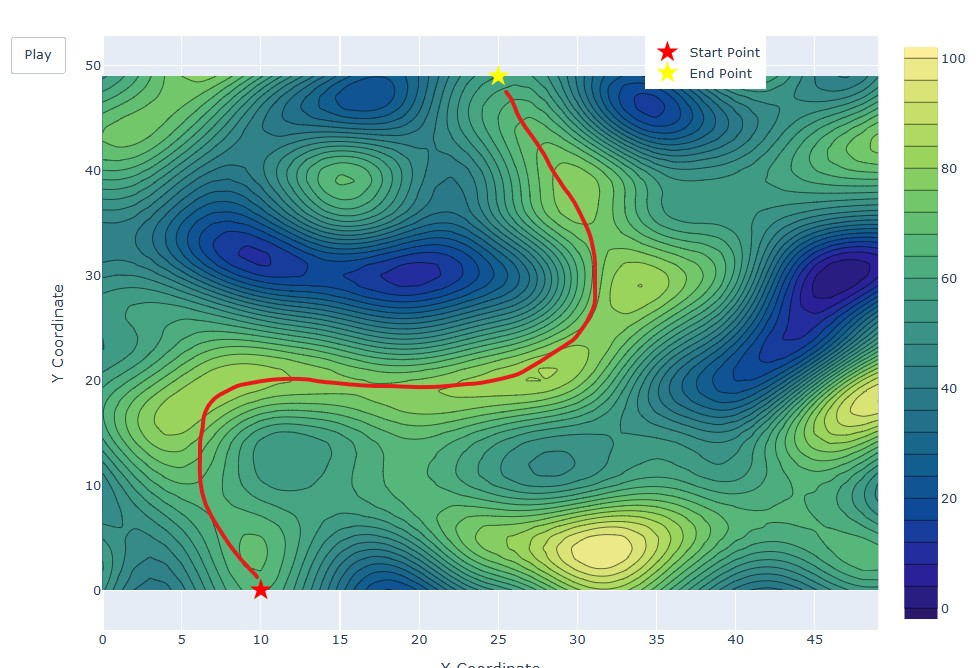